In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper')
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('data.csv')
data['StartDate'] = pd.to_datetime(data['StartDate'])
data['EndDate'] = pd.to_datetime(data['EndDate'])
data.head()

,Date,Location,Event,NumCompetitors,EventRating,Place,Name,ClubAbbr,Club,Rating,RatingEarned,StartDate,EndDate
0,08/05/2022,"Freehold Fencing Academy: Freehold, NJ",E & Under Senior Men's Epee,17.0,E1,1,"Sverdlov, Seth",ARENA FA,Arena Fencing Academy,U,E2022,2022-08-05,2022-08-05
1,08/05/2022,"Freehold Fencing Academy: Freehold, NJ",E & Under Senior Men's Epee,17.0,E1,2,"Corridon, Jack (John)",STEVENS IN,Stevens Institute Of Technology (university) ...,U,NaN,2022-08-05,2022-08-05
2,08/05/2022,"Freehold Fencing Academy: Freehold, NJ",E & Under Senior Men's Epee,17.0,E1,3,"Shin, Sangjune",MEDEO FC,Medeo Fencing Club,U,NaN,2022-08-05,2022-08-05
3,08/05/2022,"Freehold Fencing Academy: Freehold, NJ",E & Under Senior Men's Epee,17.0,E1,3,"Meng, Xiang",FREEHOLD,Freehold Fencing Academy,U,NaN,2022-08-05,2022-08-05
4,08/05/2022,"Freehold Fencing Academy: Freehold, NJ",E & Under Senior Men's Epee,17.0,E1,5,"Li, David",MEDEO FC,Medeo Fencing Club,U,NaN,2022-08-05,2022-08-05


In [3]:
data['Year'] = [d.year for d in data['StartDate']]

In [4]:
n_names_by_year = {}
for year, names in data.groupby('Year')['Name'].unique().iteritems():
    n_names_by_year[year] = len(names)
n_names_by_year

{2002: 45,
 2003: 305,
 2004: 1188,
 2005: 2651,
 2006: 5615,
 2007: 6161,
 2008: 8118,
 2009: 8163,
 2010: 8810,
 2011: 8693,
 2012: 9097,
 2013: 8730,
 2014: 8401,
 2015: 9283,
 2016: 10055,
 2017: 9403,
 2018: 8659,
 2019: 8053,
 2020: 2828,
 2021: 4276,
 2022: 4212}

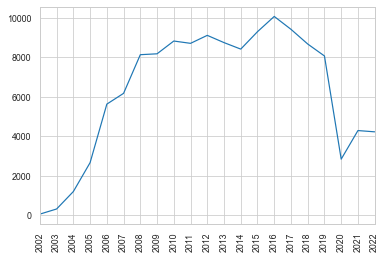

In [5]:
'''
Given this is based on tournament results, it makes sense for there to be a sharp decline in names in 2020/2021 when Cvoid
meant there were much fewer tournaments than usual. 2022's low number is due to data collection happening in August so large portion of
tournaments have yet to happen.
'''
plt.plot(n_names_by_year.keys(), n_names_by_year.values())
plt.xticks(list(n_names_by_year.keys()), rotation=90)
plt.xlim((np.min(list(n_names_by_year.keys())), np.max(list(n_names_by_year.keys()))))
plt.show()

In [7]:
data = data[data['Event'] != 'Team Event']
data['Rating'] = data['Rating'].fillna('U')
fix_df = data[[len(r) not in [1, 5] for r in data['Rating']]]
data.loc[fix_df.index, 'Name'] = [row['Name'] + row['ClubAbbr'] for idx, row in fix_df.iterrows()]
data.loc[fix_df.index, 'ClubAbbr'] = fix_df['Club']
data.loc[fix_df.index, 'Club'] = fix_df['Rating']
data.loc[fix_df.index, 'RatingEarned'] = np.nan

In [23]:
data['Rating'] = data['Rating'].fillna('U')
data['LetterRating'] = [r[0] for r in data['Rating']]
data['RatingYear'] = [int(r['Rating'][1:]) if len(r['Rating']) == 5 else np.nan for idx, r in data.iterrows()]
data['RatingAge'] = (data['Year'] - data['RatingYear']).astype(int)
data.head()

,Date,Location,Event,NumCompetitors,EventRating,Place,Name,ClubAbbr,Club,Rating,RatingEarned,StartDate,EndDate,Year,LetterRating,RatingYear,RatingAge,StandardizedRating
19,08/05/2022,"Freehold Fencing Academy: Freehold, NJ",E & Under Senior Women's Epee,10.0,E1,3,"Halm, Alexandra",FREEHOLD,Freehold Fencing Academy,E2021,NaN,2022-08-05,2022-08-05,2022,E,2021,1,E20211.0
29,07/31/2022,"Middletown High School: Middletown , CT",E & Under Senior Mixed Saber,23.0,D1,1,"DiMatteo, Michael",CANDLEWOOD,Candlewood Fencing Center,E2021,D2022,2022-07-31,2022-07-31,2022,E,2021,1,E20211.0
30,07/31/2022,"Middletown High School: Middletown , CT",E & Under Senior Mixed Saber,23.0,D1,2,"Bidwell, Ryder",EFC,Enfield Fencing Club,E2019,E2022,2022-07-31,2022-07-31,2022,E,2019,3,E20193.0
34,07/31/2022,"Middletown High School: Middletown , CT",E & Under Senior Mixed Saber,23.0,D1,6,"Fry, Nicholas",SITS,Sword in the Scroll Fencing Academy,E2018,NaN,2022-07-31,2022-07-31,2022,E,2018,4,E20184.0
52,07/31/2022,"Middletown High School: Middletown , CT",Senior Mixed Saber,22.0,D1,1,"Friebus, Andres",EFC,Enfield Fencing Club,C2019,NaN,2022-07-31,2022-07-31,2022,C,2019,3,C20193.0


In [24]:
data = data[(data['RatingAge'] > 0) & (data['RatingAge'] < 6)]
data['StandardizedRating'] = ['{}{:d}'.format(row['LetterRating'], row['RatingAge']) for idx, row in data.iterrows()]

In [33]:
'''
Nothing super interesting here, the higher ratings are patently absent from the earlier years but seem to stabilize as the years progress
probably more of an artifact of askfred's ascent than anything else?
'''
rating_distributions = data.groupby('Year')['StandardizedRating'].value_counts()
# for year, df in rating_distributions.groupby('Year'):
#     plt.pie(df, labels=df.index.get_level_values('StandardizedRating'))
#     plt.show()

In [36]:
'''
Interesting to see that A2 and E1 events are the most common tournament ratings, usually making up about 30-50% of all tournaments between 
the two. Would not expect the very bimodal in that either the event is all unrated fencers or the event is good enough to have significant 
number of skilled fencers participating. Also worth noting that this trend is most pronounced in more recent years.
'''
event_distributions = data.groupby('Year')['EventRating'].value_counts()
# for year, df in event_distributions.groupby('Year'):
#     plt.pie(df, labels=df.index.get_level_values('EventRating'))
#     plt.show()